<a href="https://colab.research.google.com/github/haedongmu/AIFFEL_quest_cr/blob/main/MainQuest/Quest02/mainquest_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#구글드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#포켓몬 데이터셋 읽기
import pandas as pd
csv_path = '/content/drive/My Drive/아이펠/Pokemon.csv'
original_data = pd.read_csv(csv_path)

In [89]:
#1. 기본모델
pokemon = original_data.copy()

# 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = original_data[features]

#정답 필드 데이터를 y에 저장
target = 'Legendary'
y = original_data[target]

from sklearn.model_selection import train_test_split

#훈련데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#Decision Tree 모델
from sklearn.tree import DecisionTreeClassifier

#Decision Tree 모델훈련
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)

#Decision Tree 모델예측
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print('-'*20,'성능평가', '-'*20)
print(classification_report(y_test, y_pred))

[[144   3]
 [  5   8]]
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [93]:
#2. 데이터 전처리
import re
import numpy as np

#'name' 필드값에서 글자수를 계산해서 'name_count'에 저장
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))

#'name_count' 값이 10이상이면 'long_name' 필드에 True로 저장
pokemon["long_name"] = pokemon["name_count"] >= 10

#name 필드값에서 띄어쓰기를 기준으로 분할하고, 영어 대문자로 시작해서 소문자로 끝이 나는 패턴을 기준으로 토큰을 나눈다.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)


all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)


from collections import Counter

#빈도수가 상위 10위 이내의 토큰값을 읽어서 변수에 저장
most_common = Counter(token_set).most_common(10)


for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

0                Articuno
1                  Zapdos
2                 Moltres
3                  Mewtwo
4     MewtwoMega Mewtwo X
             ...         
60                Diancie
61    DiancieMega Diancie
62    HoopaHoopa Confined
63     HoopaHoopa Unbound
64              Volcanion
Name: Name, Length: 65, dtype: object


,Type 1,Type 2,Electric,Flying,Poison,Water,Grass,Ghost,Steel,Ice,Dark,Bug,Fairy,Fire,Fighting,Rock,Psychic,Normal,Dragon,Ground
0,Grass,Poison,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [97]:
#3. 베이스라인 모델학습 및 분석
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

target = "Legendary"
#사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]

#정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]

#훈련데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#train 데이터로 decision tree 모델을 학습
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)

# test 데이터로 모델의 예측 값을 얻기
y_pred = model.predict(X_test)

# confusion matrix를 확인
print(confusion_matrix(y_test, y_pred))

# 성능 평가
print('-'*20,'성능평가', '-'*20)
report_dt = classification_report(y_test, y_pred, output_dict=True)
print(report_dt)

[[141   6]
 [  1  12]]
-------------------- 성능평가 --------------------
{'False': {'precision': 0.9929577464788732, 'recall': 0.9591836734693877, 'f1-score': 0.9757785467128027, 'support': 147.0}, 'True': {'precision': 0.6666666666666666, 'recall': 0.9230769230769231, 'f1-score': 0.7741935483870968, 'support': 13.0}, 'accuracy': 0.95625, 'macro avg': {'precision': 0.82981220657277, 'recall': 0.9411302982731554, 'f1-score': 0.8749860475499498, 'support': 160.0}, 'weighted avg': {'precision': 0.9664465962441314, 'recall': 0.95625, 'f1-score': 0.9593997655988391, 'support': 160.0}}


In [98]:
#4. 비교모델학습 및 비교분석
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(random_state=32)
model.fit(X_train, y_train)  # 학습하기

# 예측하기
y_pred = model.predict(X_test)

# 성능 평가
print('-'*20,'성능평가', '-'*20)
report_rf = classification_report(y_test, y_pred, output_dict=True)
print(report_rf)

-------------------- 성능평가 --------------------
{'False': {'precision': 0.9862068965517241, 'recall': 0.9727891156462585, 'f1-score': 0.9794520547945206, 'support': 147.0}, 'True': {'precision': 0.7333333333333333, 'recall': 0.8461538461538461, 'f1-score': 0.7857142857142857, 'support': 13.0}, 'accuracy': 0.9625, 'macro avg': {'precision': 0.8597701149425288, 'recall': 0.9094714809000524, 'f1-score': 0.8825831702544031, 'support': 160.0}, 'weighted avg': {'precision': 0.9656609195402298, 'recall': 0.9625, 'f1-score': 0.9637108610567516, 'support': 160.0}}


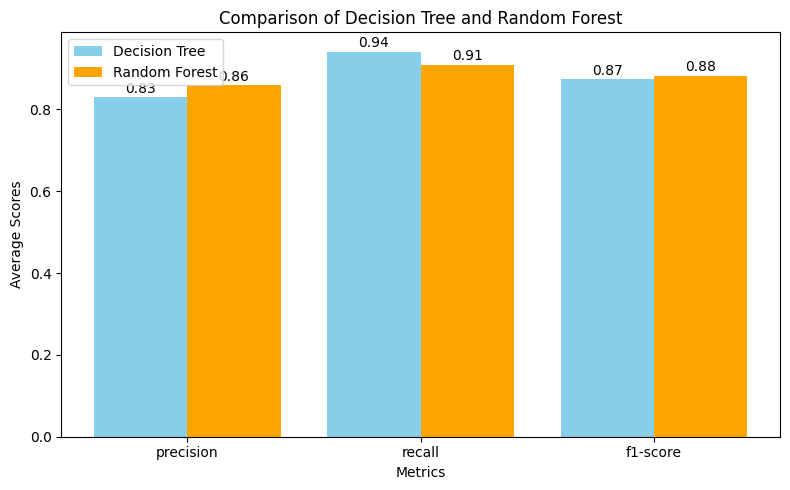

In [101]:
import matplotlib.pyplot as plt
# 비교할 주요 지표 선택
metrics = ['precision', 'recall', 'f1-score']
labels = list(report_dt.keys())[:-3]  # 마지막 3개는 avg/total 관련 데이터라 제외

# 데이터 준비
dt_values = [np.mean([report_dt[label][metric] for label in labels]) for metric in metrics]
rf_values = [np.mean([report_rf[label][metric] for label in labels]) for metric in metrics]

# 차트 생성
x = np.arange(len(metrics))
width = 0.4  # 막대 너비

fig, ax = plt.subplots(figsize=(8, 5))

# 막대 그래프 그리기
ax.bar(x - width / 2, dt_values, width, label='Decision Tree', color='skyblue')
ax.bar(x + width / 2, rf_values, width, label='Random Forest', color='orange')

# 차트 꾸미기
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Scores')
ax.set_title('Comparison of Decision Tree and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# 값 표시
for i, v in enumerate(dt_values):
    ax.text(i - width / 2, v + 0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(rf_values):
    ax.text(i + width / 2, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


#노드수행결과
1. 개요
    *  포켓몬 데이터셋에서 전설의 포켓몬과 일반 포켓몬을 구별하는 학습모델을 개발하고자 함

2. 목차
    *   기본모델학습
        * 특성 칼럼 데이터과 정답 칼럼 데이터 분할
        * 훈련데이터와 테스트데이터 분할
        * 의사결정모델훈련
        * 의사결정모델예측
        * 의사결정모델평가
    *   베이스라인모델학습
        * 데이터전처리
        * 의사결정모델훈련
        * 의사결정모델예측
        * 의사결정모델평가
    *   비교모델학습
        * 랜덤포레스트모델훈련
        * 랜덤포레스트모델예측
        * 랜덤포레스트모델평가
        * 의사결정모델과 랜덤포레스트모델 비교

3. 주석 및 의견
    * 기본모델에 비해 베이스라인모델이 더 뛰어난 성능을 보여주었다. 베이스라인모델과 랜덤포레스트모델은 비슷한 성능을 보여주었는데, 정확도와 fi-score 에서는 랜덤포레스트모델이 근소하게 앞섰고, 재현율에서는 의사결정모델이 앞섰다.
4. summary
    * 다양한 학습모델을 사용하여 테스트 해 봄으로써 최적의 학습모델을 찾을 수 있다.
5. 회고
    * 베이스라인 모델학습에서 X = pokemon[features] 부분에서 오류가 나서 오류를 해결하는데 오랜 시간이 걸렸음. 코드를 한줄씩 디버깅한 끝에 pokemon["long_name"] 코드를 넣지 않아 오류가 발생했음을 확인함
    * 시간이 조금 더 주어졌더라면 name 필드 외 다른 특성을 추출해서 학습시켜 볼 생각이었으나 예상치 못한 오류가 발생하여, 오류를 해결하는데 많은 시간을 쏟아서 시간이 없었다.
6. reference
    * chat GPT의 도움을 받아 모델성능비교 차트를 만들었음